In [1]:
import torch
from torchvision import datasets, transforms
import e2cnn
from e2cnn import nn as e2nn
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
from src.nn_training import Group, plot_schatten_norm_sums_and_loss
from src.nn_training import g_net, conv_net, fc_net
from src.nn_training import relu_g_net, relu_conv_net, relu_fc_net
from src.nn_training import relu_g_net_pool, relu_conv_net_pool, relu_fc_net_pool
from src.utils import get_training_dataframes, postprocess

In [2]:
transform_comp = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((28, 28)),
                                     transforms.Normalize((0.1307,), (0.3081,))])
mnist_data = datasets.MNIST('./data', transform=transform_comp, download=True)

batch_size = 50
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=20)

/mnt/cfs/home/krisgrg/conda_envs/ffcv_kris/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 10, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
def exp_loss(y_pred, y):
    """
    Exponential loss for classification.
    """
    print(torch.exp(-torch.real(y_pred) * y))
    return torch.mean(torch.exp(-torch.real(y_pred) * y))


In [ ]:
# %%time
experiment_name = "MNIST_CNN_100_epochs"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"CNN": conv_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=False, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
net = g_net(group)
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0058],
         [-0.0058],
         [-0.0079],
         ...,
         [ 0.0117],
         [-0.0038],
         [-0.0072]], requires_grad=True)]

In [8]:
net.state_dict()

OrderedDict([('fc1',
              tensor([[ 0.0058],
                      [-0.0058],
                      [-0.0079],
                      ...,
                      [ 0.0117],
                      [-0.0038],
                      [-0.0072]], device='cuda:0'))])

In [7]:
net = net.cuda()
net.fc1.device

device(type='cuda', index=0)

In [ ]:
%%time
experiment_name = "MNIST_GCNN_100_epochs"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"G-CNN": g_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

Will train before plotting.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/mnt/cfs/home/krisgrg/conda_envs/ffcv_kris/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 10, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


preds: tensor([[ 0.1519],
        [ 0.7463],
        [ 0.5189],
        [-0.0480],
        [ 0.2866],
        [ 0.3345],
        [ 0.7275],
        [ 1.5513],
        [ 0.0357],
        [ 0.5857],
        [ 0.0877]], device='cuda:0', grad_fn=<MmBackward0>)
preds: tensor([[0.8800],
        [0.4724],
        [0.5868],
        [0.3471],
        [0.6405],
        [0.8985],
        [0.7014],
        [0.7604]], device='cuda:0', grad_fn=<MmBackward0>)


  0%|          | 0/100 [00:00<?, ?it/s]

preds: tensor([[ 0.1775],
        [ 0.6648],
        [ 0.3250],
        [ 0.3971],
        [ 0.2881],
        [-0.1098],
        [ 0.8334],
        [ 0.0277],
        [-0.1881],
        [ 0.8636],
        [-0.5621]], device='cuda:0', grad_fn=<MmBackward0>)
preds: tensor([[1.1179],
        [0.2650],
        [1.0474],
        [0.2846],
        [0.3323],
        [0.8180],
        [0.4129],
        [0.4648]], device='cuda:0', grad_fn=<MmBackward0>)


  0%|          | 0/100 [00:00<?, ?it/s]

preds: tensor([[ 0.4703],
        [ 0.8125],
        [ 0.6187],
        [ 0.4040],
        [ 0.2958],
        [ 0.6586],
        [ 0.8826],
        [ 0.3191],
        [ 0.2080],
        [ 0.8819],
        [-0.0028]], device='cuda:0', grad_fn=<MmBackward0>)
preds: tensor([[0.7208],
        [0.5632],
        [0.8452],
        [0.6703],
        [0.8495],
        [0.6866],
        [0.9848],
        [1.3041]], device='cuda:0', grad_fn=<MmBackward0>)


  0%|          | 0/100 [00:00<?, ?it/s]

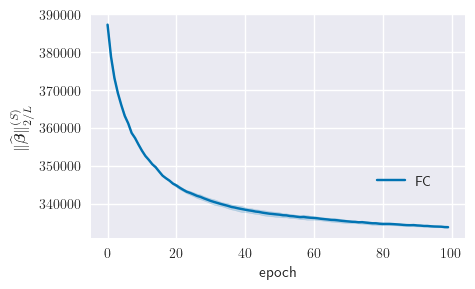

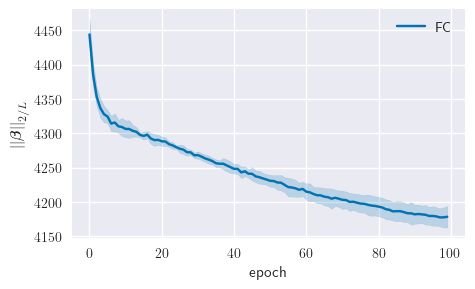

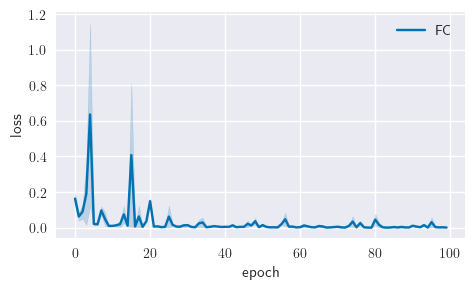

CPU times: user 6.55 s, sys: 623 ms, total: 7.17 s
Wall time: 8.03 s


In [6]:
%%time
experiment_name = "MNIST_FC_100_epochs"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=0.0001)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
experiment_name = 'MNIST_FC_100_epochs'
with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
    dfs_fc = pickle.load(f)

experiment_name = 'MNIST_CNN_100_epochs'
with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
    dfs_cnn = pickle.load(f)

experiment_name = 'MNIST_GCNN_100_epochs'
with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
    dfs_gcnn = pickle.load(f)

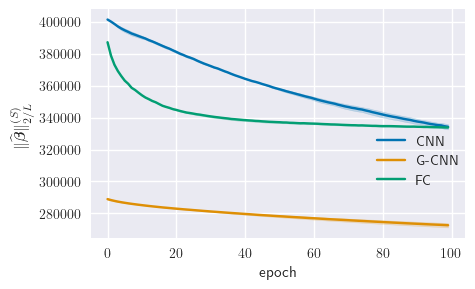

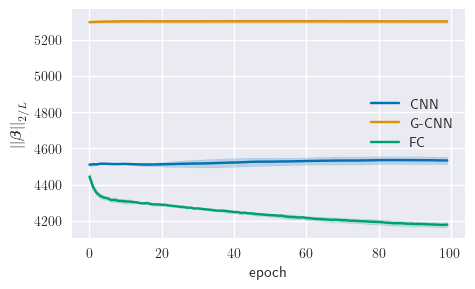

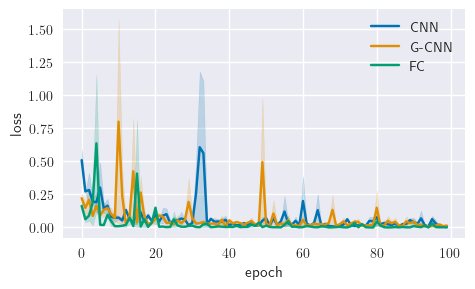

In [8]:
dfs = {**dfs_cnn, **dfs_gcnn, **dfs_fc}
experiment_name = 'MNIST_plot'
group = Group('MNIST')
dfs = plot_schatten_norm_sums_and_loss(nets={}, group=group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=0, epochs=0, cuda=True, dfs=dfs, exp_name=experiment_name)

In [ ]:
%%time
experiment_name = "MNIST_FC_relu"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=0.0001)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "MNIST_CNN_relu"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"CNN": relu_conv_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "MNIST_GCNN_relu"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = False

nets = {"G-CNN": relu_g_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=100, cuda=True, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "MNIST_FC_relu_pooling"
group = Group('MNIST')
N = 2 # average over trajectories
force_train = True

nets = {"FC": relu_fc_net_pool}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=10, cuda=True, dfs=dfs, exp_name=experiment_name, lr=1e-4)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
%%time
experiment_name = "MNIST_CNN_relu_pooling"
group = Group('MNIST')
N = 5 # average over trajectories
force_train = True

nets = {"CNN": relu_conv_net_pool}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=10, cuda=True, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
gn = g_net(group)

In [ ]:
for batch in data_loader:
    b = batch
    break

In [ ]:
z, y = postprocess(b)

In [ ]:
z = z.requires_grad_()

In [ ]:
gn(z)

In [ ]:
x = gn.conv2(gn.conv1(z))

In [ ]:
r = torch.max(x.real, dim=-1, keepdim=True)[0] + 1.j * 0

In [ ]:
pred = gn(x)

In [ ]:
loss = torch.mean(pred)

In [ ]:
loss.backward()

In [ ]:
loss

In [ ]:
from src.nn_training import exp_loss

In [ ]:
mp = torch.nn.MaxPool1d(group.order)

In [ ]:
rr = mp(x.unsqueeze(1).real).squeeze(1)

In [ ]:
rr.shape

In [ ]:
r = torch.max(x.real) + 1.j * 0

In [ ]:
loss = torch.mean(torch.exp(-r * y))
loss.backward()

In [ ]:
import torch
from torchvision import datasets, transforms
import e2cnn
from e2cnn import nn as e2nn
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
from src.nn_training import Group, plot_schatten_norm_sums_and_loss
from src.nn_training import g_net, conv_net, fc_net, g_net_jit
from src.nn_training import relu_g_net, relu_conv_net, relu_fc_net
from src.nn_training import relu_g_net_pool, relu_conv_net_pool, relu_fc_net_pool
from src.utils import get_training_dataframes, postprocess

In [ ]:
transform_comp = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((28, 28)),
                                     transforms.Normalize((0.1307,), (0.3081,))])
mnist_data = datasets.MNIST('./data', transform=transform_comp)

batch_size = 50
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=20)

In [ ]:
%%time
experiment_name = "autograd_DEBUG"
group = Group('MNIST')
N = 1 # average over trajectories
force_train = True

nets = {"G-CNN": g_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader=data_loader, postprocess_fn=postprocess,
                                       N=N, epochs=2, cuda=True, dfs=dfs, exp_name=experiment_name, lr=2e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
from torch import nn
from torch.nn.parameter import Parameter
import math

In [34]:
def g_conv_func(inp: torch.Tensor,
                filt: torch.Tensor,
                group_order: int,
                group_tensorize_inds: torch.Tensor):
    """
    Implements a G-convolution for a given group G.
    """
    n = group_order
    # inp has size (batch, n)
    unfold_input = (inp.repeat(1, n)[:, group_tensorize_inds]).reshape(-1, n, n)
    # unfolded input has size (batch, n, n)
    unfold_input = torch.transpose(unfold_input, -1, -2)
    # filt has size (1, n)
    out = filt @ unfold_input
    return torch.squeeze(out, 1)


class g_conv(nn.Module):
    """
    torch.nn.Conv1D-style conv module for group convolutions.
    """
    def __init__(self, group, bias=False, nonlinear=False):
        super().__init__()
        self.group = group
        self.nonlinear = nonlinear
        self.n = self.group.order
        self.in_features = self.n
        self.out_features = self.n
        self.weight = Parameter(torch.Tensor(1, self.in_features))
        self.reset_parameters()


    def reset_parameters(self):
        nonlinearity = 'linear' if not self.nonlinear else 'relu'
        nn.init.kaiming_uniform_(self.weight, nonlinearity=nonlinearity)
        # with torch.no_grad():
        #     self.weight *= np.sqrt(self.n)

    def forward(self, input):
        return g_conv_func(inp=input, filt=self.weight,
                           group_order=self.group.order,
                           group_tensorize_inds=self.group.tensorize_inds)


In [23]:
class g_net(nn.Module):
    """
    A simple implementation of a linear G-CNN.
    """
    def __init__(self, group):
        """
        n: (int) group order
        """
        super().__init__()
        self.group = group
        self.n = self.group.order
        self.nonlinear = False
        self.is_g = True

        self.conv1 = g_conv(self.group, nonlinear=self.nonlinear)
        self.conv2 = g_conv(self.group, nonlinear=self.nonlinear)
        self.lin_layer = torch.Tensor(self.n, 1)
        self.reset_parameters()
        self.fc1 = Parameter(self.lin_layer)

        self.l = 3  # this includes the linear layer fc1

    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()
        stdv = 1. / math.sqrt(self.n)
        self.lin_layer.data.uniform_(-stdv, stdv)

    def forward(self, x):
        return (self.conv2(self.conv1(x))) @ self.fc1

In [27]:
net = g_net(group)

In [32]:
net = net.cuda()
net.conv1.weight

Parameter containing:
tensor([[-0.0021, -0.0158, -0.0211,  ..., -0.0199,  0.0215, -0.0184]],
       device='cuda:0', requires_grad=True)

In [30]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0124],
         [ 0.0063],
         [-0.0092],
         ...,
         [-0.0003],
         [-0.0041],
         [-0.0048]], requires_grad=True),
 Parameter containing:
 tensor([[-0.0021, -0.0158, -0.0211,  ..., -0.0199,  0.0215, -0.0184]],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0216, -0.0088,  0.0126,  ..., -0.0200,  0.0002,  0.0181]],
        requires_grad=True)]